In [3]:
import sympy as sp
import numpy as np


In [4]:
x = sp.Symbol("x", real=True)

##### Dominios
- Para las racionales, calculamos los valores para los que la función no está definida, el resto es el dominio.

- En funciones cuyos dominios son intervalos, calculamos la condición correspondiente, el resultado es el dominio

In [ ]:
f1 = (x -1) / (x + 1)   # Racional ( Denominador ≠ 0 )

f2 = sp.sqrt(x + 3)     # Radical ( Lo de dentro ≥ 0 )

f3 = sp.log(x + 3)      # Logarítmica ( Lo de dentro > 0)
 

dom = sp.solve( x+1 , x )  # Valores para los que la función no está definida
display(dom)

dom = sp.solve( x+3 >= 0, x )  # Valores para los que la función está definida
display(dom)
        
dom = sp.solve( x+3 > 0, x )  # Valores para los que la función está definida
display(dom)

##### Ejercicio 2

In [ ]:
from sympy.calculus.util import continuous_domain       # Funcion que calcula el dominio directamente 
funcs = { # Diccionario | Asigna un valor ( la función ) a una clave ( f1 , f2 , f3 ...)
    "f1" : sp.sqrt(x**2 -9) ,
    "f2" : (x**2 +1) / (x**2 -1) ,
    "f3" : sp.sin((x+3)/(x-3)),
    "f4" : sp.sqrt(x**2 - 2*x -3),
    "f5" : sp.log(sp.root((x**2 +x +3) / (x**2 +1), 3) -1),
    "f6" : sp.acos((x + 2) / (x**2 + 1))
}
# Con `funcs[f]` accedemos al valor correspondiente a cada clave, a medida que avanza el bucle
for f in funcs:
    display("Dominio de la función:",  funcs[f]) 
    display(continuous_domain(funcs[f] , x , sp.Reals)) # ( expresión , variable, rango ( Reales, Naturales ...)


##### Crecimiento y decrecimiento


In [34]:
f = 2 * x**2 + 3*x -4

dx = sp.diff(f , x )            # Calculamos la derivada de la función

crec = sp.solve(dx > 0 , x)     # Valores para los que la derivada es positiva ( f crece )
decrec = sp.solve(dx < 0, x)    # Valores para los que la derivada es negativa ( f decrece )

print(crec)                     # Intervalos de crecimiento
print(decrec)                   # Intervalos de decrecimiento

-3/4 < x
x < -3/4


##### Ejercicio 3

In [39]:
funcs = {
    "f1" : x + 2, # Al calcular los intervalos de esta función con este método da un resultado "inesperado"...
    "f2" : -x**2 + 3,
    "f3" : sp.E**x+1,
    "f4" : sp.log(x**2 - 4, 10),
    "f5" : (1/2)**x,
    "f6" : 10**x
}

for f in funcs:
    dx = sp.diff(funcs[f],x)
    display("Intervalos de la función: ", funcs[f])
    print("Crecimiento: ", sp.solve(dx > 0 , x))
    print("Decrecimiento: ", sp.solve(dx < 0, x))  

'Intervalos de la función: '

x + 2

Crecimiento:  []
Decrecimiento:  []


'Intervalos de la función: '

3 - x**2

Crecimiento:  x < 0
Decrecimiento:  0 < x


'Intervalos de la función: '

exp(x) + 1

Crecimiento:  []
Decrecimiento:  []


'Intervalos de la función: '

log(x**2 - 4)/log(10)

Crecimiento:  (2 < x) | ((-2 < x) & (x < 0))
Decrecimiento:  (x < -2) | ((0 < x) & (x < 2))


'Intervalos de la función: '

0.5**x

Crecimiento:  []
Decrecimiento:  []


'Intervalos de la función: '

10**x

Crecimiento:  []
Decrecimiento:  []


##### Simetría

###### Opción 1
Calculamos $f(-x)$ y $-f(-x)$ y comprobamos si es igual a $f(x)$

In [ ]:
f = x**2                     # f(x)

f2 = funcs[f].subs({x: -x})  # f(-x)

if f == f2:                  # f(x) = f(-x)
    print("Simetría par")    
elif f == -f2:               # f(x) = -f(-x)
    print("Simetría impar")

###### Opción 2
Comprobamos $f(-x) - f(x) = 0 $ || $f(-x) + f(x) = 0$

In [ ]:
if f2 - f == 0:                 # f(-x) - f(x) = 0
    print("Simetría par")    
elif f2 + f == 0:               # f(-x) + f(x) = 0
    print("Simetría impar")

##### Ejercicio 4

In [ ]:
funcs = {
    "f1" : 3*x - x**2 ,
    "f2" : 2*x**3 - x ,
    "f3" : (1/2)*x**4 + sp.E**(x**2) + 5,
    "f4" : (sp.tan(x) + sp.sin(x)) / sp.cos(x**2),
    "f5" : (sp.cos(2*x) - sp.sin(x)) / (x**2 * sp.cos(x)),
    "f6" : (x**4 * sp.sin(x)**3) / sp.tan(x),
    "f7" : sp.Piecewise(
        (x * (x + 1)**2 , x > 0),
        (-x * (x + 1)**2 , x< 0),
    ),
    "f8" : (x**4 - sp.cos(x)) / (x**2 - sp.sin(x))
}


for f in funcs:
    display(" Simetría de la función: ", funcs[f]) # Sustituímos la x por -x | Calculamos f(-x)

    f2 = funcs[f].subs({x: -x})
# Hay que usar esta condición porque otras dan falsos positivos/negativos 
    if sp.simplify(f2 - funcs[f]) == 0:      # Simetría par | f(-x) - f(x) = 0
        print("[+] Simetría par")
    elif sp.simplify(f2 + funcs[f]) == 0:    # Simetría impar | f(-x) + f(x) = 0
        print("[-] Simetría impar")
    else:
        print("[!] La función no es simétrica")

##### Ejercicio 5
Una función es periódica si $f(x + T) = f(x)$ . Sin embargo, calculamos el periodo con una función concreta.


In [ ]:
funcs = {
    "f1" : sp.sin(3*x),
    "f2" : sp.cos(x-2),
    "f3" : sp.cos(x) -2,
    "f4" : sp.tan(x - (sp.pi/2)),
    "f5" : 4*sp.sin(x) + 3*sp.cos(2*x) - 5*sp.sin(sp.Rational(2,5)*x), # Importante usar sp.Rational
}

for f in funcs:
    T = sp.periodicity( funcs[f], x) # Periodo de la función
    display("Periodicidad de la función", funcs[f])
    display(T)


##### Composición de funciones
$f ◦ g = f(g(x))$

$g ◦ f = g(f(x))$ 


$ Dom(f ◦ g) = \{ x ∈ Dom(f) / f(x) ∈ Dom(g) \}  $

In [ ]:
# Definimos las expresiones
f = (6*x) / (x**2 - 9)
g = sp.sqrt(3*x)

# Las transformamos en funciones para facilitar la composición
f = sp.Lambda(x , f)
g = sp.Lambda(x , g)

# Las componemos | f ◦ g
c1 = f(g(12))
c2 = f(g(x))

# Dominio sin uso de continuous_domain: 1º Obtenemos la expresión compuesta | 2º Calculamos el dominio de esa función


##### Ejercicio 6


In [ ]:
from sympy.calculus.util import continuous_domain

f = (6*x) / (x**2 - 9)
g = sp.sqrt(3*x)

f = sp.Lambda(x , f)
g = sp.Lambda(x , g)


c1 = f(g(12))
c2 = f(g(x))    # f ◦ g

dom = continuous_domain(c2 , x , sp.Reals)

c3 = g(f(x))

dom2 = continuous_domain(c3 , x , sp.Reals)

display("(f ◦ g)(12): ", c1)
display("(f ◦ g)(x): ",c2)

display("Dominio de f ◦ g: ", dom)

display("(g ◦ f)(x): ", c3)
display("Dominio de g ◦ f: ", dom2)

if c2 == c3:
    print("La composición es conmutativa")
else: print("La composición no es conmutativa")

##### Ejercicio 7


In [ ]:
f = (4*x**2 + 1) / (x - 1)
g = (x - 1) / x**2

f = sp.Lambda(x , f)
g = sp.Lambda(x , g)

c = 0

if f(g(1)) == -1 and g(f(1)) == 0:
    c += 1
    print("La opción A es correcta")

if f(g(2)) == sp.Rational( -5 , 3) and g(f(0)) == -2:
    c +=1
    print("La opción B es correcta")

if f(g(-1)) == sp.Rational(17 , 3) and g(f(-1)) == g(sp.Rational(5, 2)):
    c+=1
    print("La opción C es correcta")

if c == 0:
    print("Ninguna es correcta")

##### Ejercicio 8
!!! Cuando tenemos que componer dos funciones con incógnitas distintas ( En este caso, a(r) y r(t) ), **tenemos que componer nosotros las funciones**.

In [ ]:
t = sp.Symbol("t")

# r = 18 / (2*t + 3)
a = sp.pi * (18 / (2*t + 3))**2  # Función ya compuesta | a ◦ r = a(r(t))

display("a ◦ r: ", a)

a = sp.Lambda(t , a) 

c = a(3)  # Prueba con 3 minutos

display(c)

##### Ejercicio 9


In [ ]:
a = sp.Symbol("a")

# x = 100 + sp.sqrt(a/12)
n = 10 + sp.Rational(5,100)*(100 + sp.sqrt(a/12))  # n ◦ x

display("n ◦ x: ", n)


# b)
n = sp.Lambda(a, n)
display(n(4800))

# c)
a = 12 * (x-100)**2
display(a)

##### Ejercicio 10
Lo calculamos calculando la monotonía de la función, la cual averiguamos con el **signo de la derivada**, si es estrictamente creciente o estrictamente decreciente, es inyectiva.
Usamos `solveset` porque facilita el manejo de condiciones cuando forzamos a nuestras variables simbólicas a ser Reales

In [ ]:
f = x*2

df = sp.diff(f, x)  # Derivada de la función

crec = sp.solveset(df > 0, x, sp.Reals)             # Si crece, su decrecimiento será ∅
decrec = sp.solveset(df < 0, x, domain=sp.Reals)    # Si decrece, su crecimiento será ∅

display(crec)   # Intervalo donde crece
display(decrec) # Intervalo donde decrece

if crec == sp.EmptySet or decrec == sp.EmptySet:  # Que uno sea ∅ , implica que en ningún punto es creciente/decreciente, por lo que solo es uno a la vez ( estricto )
    print("[!] Es inyectiva")
else:
    print("[!] No es inyectiva ")


##### Comprobación de inyección usando la definición

$si\ f(a)=f(b),\ entonces\ a=b.$

In [31]:
k = 1 / ( 1 + sp.E**(-x))

a , b = sp.symbols("a b")  # Declaramos dos variables que actuarán como números cualesquiera

sol = sp.solve(k.subs(x, a) - k.subs({x: b}), a)  # Resolvemos la ecuación 

soluciones = [sol for sol in sol if not sol.has(sp.I)] # Eliminamos las soluciones complejas


# FORZADO DE SIMPLIFICACIÓN !!!!!!!
solucion = soluciones[0]
solucion = sp.expand_log(solucion, force=True)
solucion = sp.powsimp(solucion, force=True)
solucion = sp.simplify(solucion)
display(solucion)


b

##### Comprobación de si dos funciones son inversas
Lo comprobamos : $f ◦ g = x$ y $g ◦ f = x$

In [5]:
f = (x-1) / (x+1)
g = (x+1) / (1-x)
# Preparamos las expresiones para componerlas
f = sp.Lambda(x , f)
g = sp.Lambda(x , g)

display("Función sin simplificar: ", f(g(x)))                # Importante simplificar
display("Función simplificada: " ,sp.simplify(f(g(x))))                     


if sp.simplify(f(g(x))) == x and sp.simplify(g(f(x))) == x:  # Componemos ambas funciones y verificamos que dan x
    print("f y g son inversas entre sí")

'Función sin simplificar: '

(-1 + (x + 1)/(1 - x))/(1 + (x + 1)/(1 - x))

'Función simplificada: '

x

f y g son inversas entre sí


##### Ejercicio 12

In [ ]:
f = (x-1) / (x+1)
g = (x+1) / (1-x)

f = sp.Lambda(x , f)
g = sp.Lambda(x , g)

display("Función sin simplificar: ", f(g(x)))                
display("Función simplificada: " ,sp.simplify(f(g(x))))                     


if sp.simplify(f(g(x))) == x and sp.simplify(g(f(x))) == x: 
    print("[+] f y g son inversas entre sí")


##### Cálculo de inversas
- Escribe la función: 

$y=f(x)$

- Intercambia las variables:

$x↔y$

- Despeja $y$

- Cambia $y$ por $f⁻¹(x)$

OJO: Este método devuelve la función en función de y, aún queda intercambiarla por x 

In [6]:
f = (x-1) / (x+1)
y = sp.Symbol("y")

inv = sp.solve(f - y, x) # Resolvemos f(x) - y = 0 porque f(x) = y

display("Función inversa: ", sp.simplify(inv[0].subs({y:x}))) # Solve devuelve una lista, con [i] mostramos el elemento siendo i el índice.
                                                  # También simplificamos por si acaso

'Función inversa: '

(-x - 1)/(x - 1)

##### Ejercicio 13

In [ ]:
from sympy.calculus.util import continuous_domain
f = 5**x -2
y = sp.Symbol('y')

inv = sp.solve(f - y, x) # Calculamos la inversa ( Ojo, crea una "lista")

dom = continuous_domain(inv[0].subs({y:x}) , x , sp.Reals)  

display("Función inversa: ", inv[0].subs({y:x})) # Sacamos el único elemento de la lista

display(dom)

#### Ejercicio 14

In [ ]:
f = sp.E**(x**3 +1) 

# a)
inv = sp.solve(f - y, x)
display("Existe inversa: ", sp.simplify(inv[2].subs({y:x})))  # Vemos 3 soluciones, pero solo una es Real | Además, es mejor simplificarla 

# b , c , d
p = sp.log(x**3 + 1)
q = (sp.log(x)-1)**(sp.Rational(1,3))
r = 1 / sp.E**(x**3 +1)


if sp.simplify(inv[2].subs({y:x})) == p:
    print("Opción A")
elif sp.simplify(inv[2].subs({y:x})) == q:
    print("Opción B")
elif sp.simplify(inv[2].subs({y:x})) == r:
    print("Opción C")


##### Ejercicio 15

In [7]:
y = sp.Symbol("y", reals=True, positive=True) # Añadir `positive=True` ayudó a arreglar el output de una función, considera usarlo si ves algo raro
funcs = {
    "f1": x**3 + 5,
    "f2": sp.sin(2*x - 7),
    "f3": sp.E**(x*2),  
    "f4": sp.Rational(1,5) + sp.E**x,
    "f5": sp.sqrt(2*x - 3),
    "f6": sp.cbrt(((x+1)/2)),
    "f7": (1 + x**2) / x**2
}

for f in funcs:
    print(f"\n{'='*50}")
    print(f" {f}: {funcs[f]}")
    print('='*50)
    
    df = sp.diff(funcs[f], x)  # Derivada de la función
    display("Derivada:", df)
    
    # Calculamos la monotonía 
    cm1 = sp.solveset(df >= 0, x, domain=sp.Reals)
    cm2 = sp.solveset(df <  0, x, domain=sp.Reals)


    if cm1 == sp.EmptySet or cm2 == sp.EmptySet:      
        inv = sp.solve(funcs[f] - y, x, domain=sp.Reals)
        inv_real= [sol for sol in inv if not sol.has(sp.I)] # Eliminamos soluciones Complejas

        if len(inv_real) > 0:  # Si el cálculo devuelve varias inversas, algo va mal
            inv_real = inv_real[0].subs({y:x})  # Dado que `solve` devuelve una lista, y con variable = y. Accedemos a su elemento y cambiamos la variable
            display("Inversa:", inv_real)
            
            f = sp.Lambda(x, funcs[f])
            g = sp.Lambda(x, inv_real)
            
            # Composición de funciones para la comprobación de la inversa
            comp1 = sp.simplify(f(g(x)))  
            comp2 = sp.simplify(g(f(x)))

            if comp1.subs({x:3}) == comp2.subs({x:3}):  # Porque lo compruebo así y no como en la explicación anterior? Mira la celda siguiente
                print("[+] f y f⁻¹ son efectivamente inversas entre sí")
            else:
                print("[✗] No se pudo verificar la composición")
    else:
        print("[✗] No tiene inversa ( no es inyectiva )")


 f1: x**3 + 5


'Derivada:'

3*x**2

'Inversa:'

(x - 5)**(1/3)

[+] f y f⁻¹ son efectivamente inversas entre sí

 f2: sin(2*x - 7)


'Derivada:'

2*cos(2*x - 7)

[✗] No tiene inversa ( no es inyectiva )

 f3: exp(2*x)


'Derivada:'

2*exp(2*x)

'Inversa:'

log(x)/2

[+] f y f⁻¹ son efectivamente inversas entre sí

 f4: exp(x) + 1/5


'Derivada:'

exp(x)

'Inversa:'

log(x - 1/5)

[+] f y f⁻¹ son efectivamente inversas entre sí

 f5: sqrt(2*x - 3)


'Derivada:'

1/sqrt(2*x - 3)

'Inversa:'

x**2/2 + 3/2

[+] f y f⁻¹ son efectivamente inversas entre sí

 f6: (x/2 + 1/2)**(1/3)


'Derivada:'

1/(6*(x/2 + 1/2)**(2/3))

'Inversa:'

2*x**3 - 1

[+] f y f⁻¹ son efectivamente inversas entre sí

 f7: (x**2 + 1)/x**2


'Derivada:'

2/x - 2*(x**2 + 1)/x**3

[✗] No tiene inversa ( no es inyectiva )


### ¿Por qué?
Resulta que usando la forma habitual para comprobar si dos funciones son efectivamente inversas, Sympy decidía no simplificar las composiciones, regalandome algo como esto:

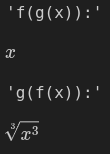

Y como son iguales, si sustituyo x por 3 debería dar lo mismo, y efectivamente funcionó.